<a href="https://colab.research.google.com/github/MohebZandi/Comupter_Vision/blob/main/Biomedical_Image_Processing_Data_Camp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration
Prepare to conquer the Nth dimension! To begin the course, you'll learn how to load, build and navigate N-dimensional images using a CT image of the human chest. 

You'll also leverage the useful ImageIO package and hone your NumPy and matplotlib skills.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive') 
dir = '/content/gdrive/My Drive/Video_Image_processing/'
dir_chest = '/content/gdrive/My Drive/Video_Image_processing/Chest_data/'

Mounted at /content/gdrive


In [ ]:
def show_image(image, title='Image', cmap_type='gray'):
    import matplotlib.pyplot as plt
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

Image type: <class 'imageio.core.util.Array'>
Shape of image array: (512, 512)


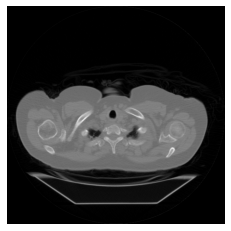

In [ ]:
# Import ImageIO
import imageio

# Load "chest-220.dcm"
im = imageio.imread(dir_chest + 'chest-220.dcm')

# Print image attributes
print('Image type:', type(im))
print('Shape of image array:', im.shape)

#show the Image
plt.imshow(im, cmap= 'gray')
plt.axis('off')
plt.show()

Metadata
ImageIO reads in data as Image objects. These are standard NumPy arrays with a dictionary of metadata.

Metadata can be quite rich in medical images and can include:

Patient demographics: name, age, sex, clinical information
Acquisition information: image shape, sampling rates, data type, modality (such as X-Ray, CT or MRI)

Start this exercise by reading in the chest image and listing the available fields in the meta dictionary.

In [ ]:
# Import ImageIO
import imageio
im = imageio.imread(dir_chest + 'chest-220.dcm')

# Dict([('TransferSyntaxUID', '1.2.840.10008.1.2'), ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.2'), 
# ('SOPInstanceUID', '1.3.6.1.4.1.14519.5.2.1.5168.1900.290866807370146801046392918286'), ('StudyDate', '20040529'), 
# ('SeriesDate', '20040515'), ('ContentDate', '20040515'), ('StudyTime', '115208'), ('SeriesTime', '115254'), 
# ('ContentTime', '115325'), ('Modality', 'CT'), ('Manufacturer', 'GE MEDICAL SYSTEMS'), ('StudyDescription', 'PET CT with registered MR'), 
# ('SeriesDescription', 'CT IMAGES - RESEARCH'), ('PatientName', 'STS_007'), ('PatientID', 'STS_007'), ('PatientBirthDate', ''), 
# ('PatientSex', 'F '), ('PatientWeight', 82.0), ('StudyInstanceUID', '1.3.6.1.4.1.14519.5.2.1.5168.1900.381397737790414481604846607090'), 
# ('SeriesInstanceUID', '1.3.6.1.4.1.14519.5.2.1.5168.1900.315477836840324582280843038439'), ('SeriesNumber', 2), ('AcquisitionNumber', 1), ('InstanceNumber', 57), 
# ('ImagePositionPatient', (-250.0, -250.0, -180.62)), ('ImageOrientationPatient', (1.0, 0.0, 0.0, 0.0, 1.0, 0.0)), ('SamplesPerPixel', 1), 
# ('Rows', 512), ('Columns', 512), ('PixelSpacing', (0.976562, 0.976562)), ('BitsAllocated', 16), ('BitsStored', 16), ('HighBit', 15), 
# ('PixelRepresentation', 0), ('RescaleIntercept', -1024.0), ('RescaleSlope', 1.0), 
# ('PixelData', b'Data converted to numpy array, raw data removed to preserve memory'), ('shape', (512, 512)), ('sampling', (0.976562, 0.976562))])


# Print the available metadata fields
print(im.meta.keys())
# Output:
# odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'ContentTime', 
# 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientWeight', 
# 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 
# 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 
# 'PixelData', 'shape', 'sampling'])


print('\nPatientSex : ',im.meta['PatientSex'])

odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'ContentTime', 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientWeight', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])

PatientSex :  F 


Plot images
Perhaps the most critical principle of image analysis is: look at your images!

Matplotlib's imshow() function gives you a simple way to do this. Knowing a few simple arguments will help:

- cmap controls the color mappings for each value. The "gray" colormap is common, but many others are available.

- vmin and vmax control the color contrast between values. Changing these can reduce the influence of extreme values.

- plt.axis('off') removes axis and tick labels from the image.

For this exercise, plot the CT scan and investigate the effect of a few different parameters.

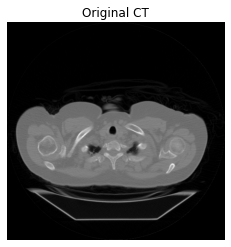

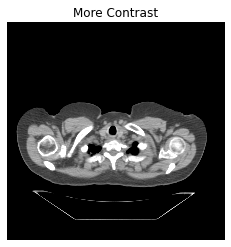

In [ ]:
# Import ImageIO
import imageio

# Load "chest-220.dcm"
im = imageio.imread(dir_chest + 'chest-220.dcm')

# Show Original CT
show_image(im, 'Original CT')

# Draw the image with greater contrast
plt.imshow(im, cmap= 'gray', vmin= -200, vmax= 200)

# Remove axis ticks and labels
plt.axis('off')
plt.title('More Contrast')
# Render the image
plt.show()

In [ ]:
# Import ImageIO and numpy
import imageio
import numpy as np

# Read in each 2D image
im1 = imageio.imread(dir_chest + 'chest-220.dcm')
im2 = imageio.imread(dir_chest + 'chest-221.dcm')
im3 = imageio.imread(dir_chest + 'chest-222.dcm')
im4 = imageio.imread(dir_chest + 'chest-224.dcm')

print(im1.shape)

# Stack images into a volume
vol_3 = np.stack([im1, im2, im3])
vol_4 = np.stack([im1, im2, im3, im4])
print(vol_3.shape)
print(vol_4.shape)

(512, 512)
(3, 512, 512)
(4, 512, 512)


In [ ]:
# Import ImageIO
import imageio

# Load the "tcia-chest-ct" directory
vol = imageio.volread(dir_chest)

# Print image attributes
print('\n\nAvailable metadata:', vol.meta.keys())
print('\n\nShape of image array:', vol.shape)
print('\n\nSampling rate is : ', vol.meta['sampling'])

Reading DICOM (examining files): 1/5 files (20.0%)5/5 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 5/5  (100.0%)


Available metadata: odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'ContentTime', 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientWeight', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])


Shape of image array: (5, 512, 512)


Sampling rate is :  (3.269999999999996, 0.976562, 0.976562)


In [ ]:
import imageio

vol = imageio.volread(dir_chest)
vol.shape

Reading DICOM (examining files): 1/5 files (20.0%)5/5 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 5/5  (100.0%)


(5, 512, 512)

In [ ]:
vol[0].shape

(512, 512)

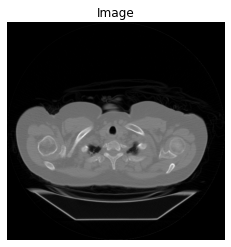

In [ ]:
show_image(vol[0])

**Field of view**

The amount of physical space covered by an image is its field of view, which is calculated from two properties:

Array shape, the number of data elements on each axis. Can be accessed with the shape attribute.

- Sampling resolution, the amount of physical space covered by each pixel. 

- Sometimes available in metadata (e.g., meta['sampling']).

In [ ]:
# Import ImageIO
import imageio

# Load the "tcia-chest-ct" directory
vol = imageio.volread(dir_chest)

# Print image attributes

print('\n\nShape of image array:', vol.shape)
print('\n\nSampling rate is : ', vol.meta['sampling'])

# Field of view
n0, n1, n2 = vol.shape
d0, d1, d2 = vol.meta['sampling']
n0*d0, n1*d1, n2*d2

Reading DICOM (examining files): 1/5 files (20.0%)5/5 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 5/5  (100.0%)


Shape of image array: (5, 512, 512)


Sampling rate is :  (3.269999999999996, 0.976562, 0.976562)


(16.34999999999998, 499.999744, 499.999744)

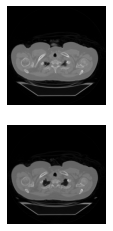

In [ ]:
# Import PyPlot
import matplotlib.pyplot as plt

# Read in each 2D image
im1 = imageio.imread(dir_chest + 'chest-220.dcm')
im2 = imageio.imread(dir_chest + 'chest-221.dcm')

# Initialize figure and axes grid
fig, axes = plt.subplots( nrows= 2, ncols= 1)

# Draw an image on each subplot
axes[0].imshow(im1, cmap= 'gray')
axes[1].imshow(im2, cmap= 'gray')

# Remove ticks/labels and render
axes[1].axis('off')
axes[0].axis('off')
plt.show()

Reading DICOM (examining files): 1/5 files (20.0%)5/5 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 5/5  (100.0%)


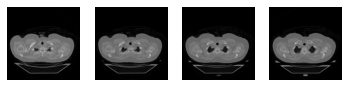

In [ ]:
# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows=1, ncols=4)

# Load the "tcia-chest-ct" directory
vol = imageio.volread(dir_chest)

# Loop through subplots and draw image
for ii in range(4):
    im = vol[ii, :, :]
    axes[ii].imshow(im, cmap='gray')
    axes[ii].axis('off')
    
# Render the figure
plt.show()

Reading DICOM (examining files): 1/5 files (20.0%)5/5 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 5/5  (100.0%)
3.3484817144226335 3.3484817144226335


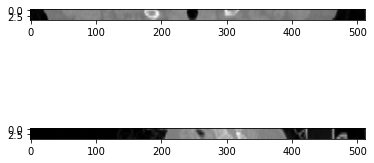

In [ ]:
# Select frame from "vol"
im1 = vol[:, 256, :]
im2 = vol[:, :, 256]

# Load the "tcia-chest-ct" directory
vol = imageio.volread(dir_chest)

# Compute aspect ratios
d0, d1, d2 = vol.meta['sampling']
asp1 = d0 / d2
asp2 = d0 / d1
print(asp1, asp2)

# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].imshow(im1, cmap='gray', aspect= asp1)
axes[1].imshow(im2, cmap='gray', aspect= asp2)
plt.show()

# Masks and Filters

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import scipy.ndimage as ndi

from google.colab import drive
drive.mount('/content/gdrive') 
dir = '/content/gdrive/My Drive/Video_Image_processing/'
dir_chest = '/content/gdrive/My Drive/Video_Image_processing/Chest_data/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
def show_image(image, title='Image', cmap_type='gray'):
    import matplotlib.pyplot as plt
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [8]:
def format_and_render_plot():
    '''Custom function to simplify common formatting operations for exercises. Operations include: 
    1. Turning off axis grids.
    2. Calling `plt.tight_layout` to improve subplot spacing.
    3. Calling `plt.show()` to render plot.'''
    fig = plt.gcf()
    fig.axes[0].axis('off')
    plt.tight_layout()
    plt.show()

Data type: uint8
Min. value: 3
Max value: 224


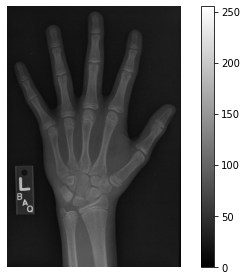

In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

# Load the hand radiograph
dir = '/content/gdrive/My Drive/Video_Image_processing/'
im = imageio.imread(dir + 'hand.png')
print('Data type:', im.dtype)
print('Min. value:', im.min())
print('Max value:', im.max())

# Plot the grayscale image
plt.imshow(im, vmin=0, vmax= 255, cmap= 'gray')
plt.colorbar()
format_and_render_plot()

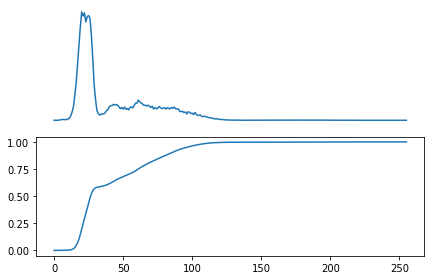

In [ ]:
# Import SciPy's "ndimage" module
import scipy.ndimage as ndi 

# Create a histogram, binned at each possible value
hist = ndi.histogram(im, min=0, max= 255, bins = 256)

# Create a cumulative distribution function
cdf = hist.cumsum() / hist.sum()

# Plot the histogram and CDF
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='CDF')
format_and_render_plot()

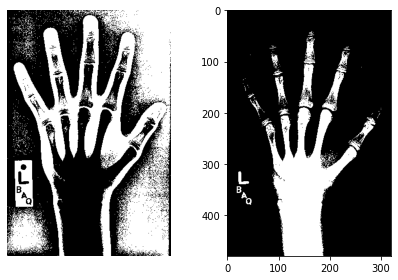

In [ ]:
# Load the hand radiograph
dir = '/content/gdrive/My Drive/Video_Image_processing/'
im = imageio.imread(dir + 'hand.png')

# Create skin and bone masks
mask_bone = im >= 70
mask_skin = (im >= 24) & (im < 70)

# Plot the skin (0) and bone (1) masks
fig, axes = plt.subplots(1,2)
axes[0].imshow(mask_skin, cmap= 'gray')
axes[1].imshow(mask_bone, cmap= 'gray')
format_and_render_plot()

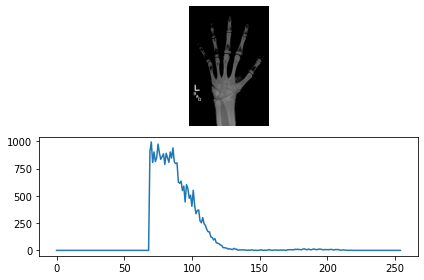

In [ ]:
# Import SciPy's "ndimage" module
import scipy.ndimage as ndi

# Load the hand radiograph
dir = '/content/gdrive/My Drive/Video_Image_processing/'
im = imageio.imread(dir + 'hand.png')

# Screen out non-bone pixels from "im"
mask_bone = im >= 70
im_bone = np.where(mask_bone, im, 0)

# Get the histogram of bone intensities
hist = ndi.histogram(im_bone, min=1, max= 255, bins= 255)

# Plot masked image and histogram
fig, axes = plt.subplots(2,1)
axes[0].imshow(im_bone, cmap= 'gray')
axes[1].plot(hist)
format_and_render_plot()

Tune a mask

Imperfect masks can be tuned through the addition and subtraction of pixels. SciPy includes several useful methods for accomplishing these ends. These include:

- binary_dilation: Add pixels along edges

- binary_erosion: Remove pixels along edges
- binary_opening: Erode then dilate, "opening" areas near edges
- binary_closing: Dilate then erode, "filling in" holes

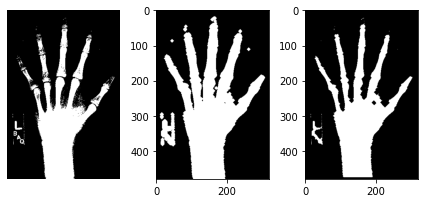

In [ ]:
# Load the hand radiograph
dir = '/content/gdrive/My Drive/Video_Image_processing/'
im = imageio.imread(dir + 'hand.png')

# Create and tune bone mask
mask_bone = im >=65
mask_dilate = ndi.binary_dilation(mask_bone, iterations= 5)
mask_closed = ndi.binary_closing(mask_bone, iterations= 5)

# Plot masked images
fig, axes = plt.subplots(1,3)
axes[0].imshow(mask_bone, cmap= 'gray')
axes[1].imshow(mask_dilate, cmap= 'gray')
axes[2].imshow(mask_closed, cmap= 'gray')
format_and_render_plot()

Filter convolutions

Filters are an essential tool in image processing. They allow you to transform images based on intensity values surrounding a pixel, rather than globally.

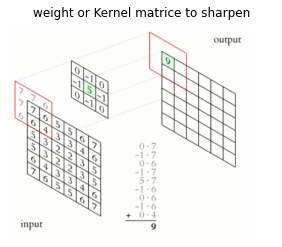

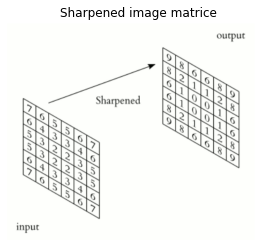

In [ ]:
dir = '/content/gdrive/My Drive/Video_Image_processing/'
matrice1 = imageio.imread(dir + 'Convolution_filter_1.png')
matrice2 = imageio.imread(dir + 'Convolution_filter_2.png')

show_image(matrice1, 'weight or Kernel matrice to sharpen')
show_image(matrice2, 'Sharpened image matrice')

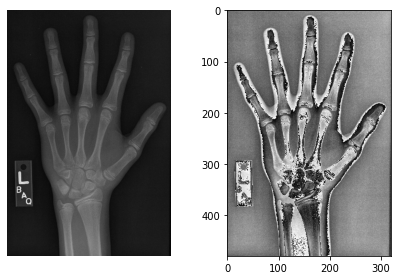

In [34]:
# Load the hand radiograph
dir = '/content/gdrive/My Drive/Video_Image_processing/'
im = imageio.imread(dir + 'hand.png')

# Set filter weights
weights = [[0.11, 0.11, 0.11],
           [0.11, 0.11, 0.11], 
           [0.11, 0.11, 0.11]]

# Convolve the image with the filter
im_filt = ndi.convolve(im, weights)

# Plot the images
fig, axes = plt.subplots(1,2)
axes[0].imshow(im, cmap= 'gray')
axes[1].imshow(im_filt, cmap= 'gray')
format_and_render_plot()

**Smoothing**

Smoothing can improve the signal-to-noise ratio of your image by blurring out small variations in intensity. 

The Gaussian filter is excellent for this: it is a circular (or spherical) smoothing kernel that weights nearby pixels higher than distant ones.

The width of the distribution is controlled by the sigma argument, with higher values leading to larger smoothing effects.

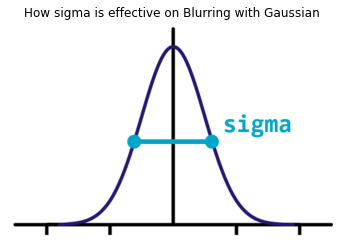

In [ ]:
dir = '/content/gdrive/My Drive/Video_Image_processing/'
sigma = imageio.imread(dir + 'Ch2_L2_Gaussian1D.png')
show_image(sigma, 'How sigma is effective on Blurring with Gaussian')

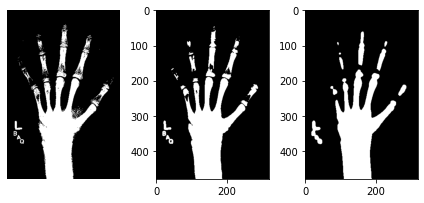

In [ ]:
# Load the hand radiograph
dir = '/content/gdrive/My Drive/Video_Image_processing/'
im = imageio.imread(dir + 'hand.png')

# Smooth "im" with Gaussian filters
im_s1 = ndi.gaussian_filter(im, sigma= 1)
im_s3 = ndi.gaussian_filter(im, sigma= 3)

# Draw bone masks of each image
fig, axes = plt.subplots(1,3)
axes[0].imshow(im >= 70, cmap= 'gray')
axes[1].imshow(im_s1 >= 70, cmap= 'gray')
axes[2].imshow(im_s3 >= 70, cmap= 'gray')
format_and_render_plot()

**Detect edges (1)**

Filters can also be used as "detectors." If a part of the image fits the weighting pattern, the returned value will be very high (or very low).

In the case of edge detection, that pattern is a change in intensity along a plane. A filter detecting horizontal edges might look like this:

weights = [[+1, +1, +1],
           [ 0,  0,  0],
           [-1, -1, -1]]

In [36]:
weights = [[+1, +1, +1],
           [ 0,  0,  0],
           [-1, -1, -1]]

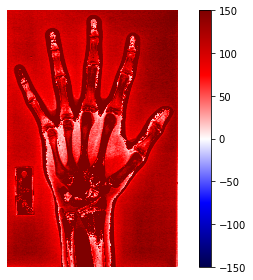

In [40]:
# Import SciPy's "ndimage" module
import scipy.ndimage as ndi
import imageio
import matplotlib.pyplot as plt

# Load the hand radiograph
dir = '/content/gdrive/My Drive/Video_Image_processing/'
im = imageio.imread(dir + 'hand.png')

# Set weights to detect vertical edges
# weights = [[1, 1, 1], 
        #    [0, 5, 0], 
        #    [-1, -1, -1]]

# Convolve "im" with filter weights
edges = ndi.convolve(im, weights)

# Draw the image in color
plt.imshow(edges, cmap= 'seismic', vmin=-150, vmax=150)
plt.colorbar()
format_and_render_plot()

**Detect edges (2)**

Edge detection can be performed along multiple axes, then combined into a single edge value. For 2D images, the horizontal and vertical "edge maps" can be combined using the Pythagorean theorem:


One popular edge detector is the Sobel filter. The Sobel filter provides extra weight to the center pixels of the detector:

weights = [[ 1,  2,  1], 
           [ 0,  0,  0],
           [-1, -2, -1]]

In [41]:
weights = [[ 1,  2,  1], 
           [ 0,  0,  0],
           [-1, -2, -1]]

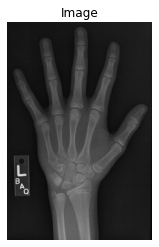

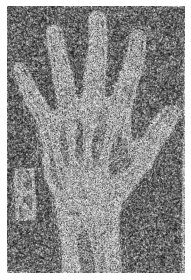

In [42]:
# Import SciPy's "ndimage" module
import scipy.ndimage as ndi
import imageio
import matplotlib.pyplot as plt

# Load the hand radiograph
dir = '/content/gdrive/My Drive/Video_Image_processing/'
im = imageio.imread(dir + 'hand.png')
show_image(im)

# Apply Sobel filter along both axes
sobel_ax0 = ndi.sobel(im, axis= 0)
sobel_ax1 = ndi.sobel(im,  axis= 1)

# Calculate edge magnitude 
sobels = np.square(sobel_ax0) + np.square(sobel_ax1)
edges = np.sqrt(sobels).astype(int)

# Plot edge magnitude
plt.imshow(edges, cmap= 'gray')#, vmax= 255)
format_and_render_plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  if sys.path[0] == '':


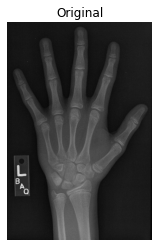

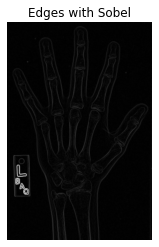

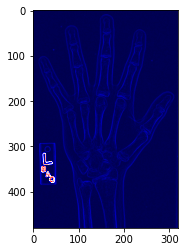

In [43]:
# Import the color module
from skimage import color

# Import the filters module and sobel function
from skimage.filters import sobel

# Load the hand radiograph
dir = '/content/gdrive/My Drive/Video_Image_processing/'
image1 = imageio.imread(dir + 'hand.png')

# Make the image grayscale
image_gray = color.rgb2gray(image1)

# Apply edge detection filter
edge_sobel = sobel(image_gray)

# Show original and resulting image to compare
show_image(image1, "Original")
show_image(edge_sobel, "Edges with Sobel")
plt.imshow(edge_sobel, cmap= 'seismic')
plt.show()

# Measurement

In this chapter, you'll get to the heart of image analysis: object measurement.

Using a 4D cardiac time series, you'll determine if a patient is likely to have heart disease. Along the way, you'll learn the fundamentals of image segmentation, object labeling, and morphological measurement.

Robust image segmentation is an entire research domain, but the simple principle is to leverage intensity and location information to differentiate objects of interest from the background. Once labeled, the objects can be manipulated easily.

Num. Labels: 26


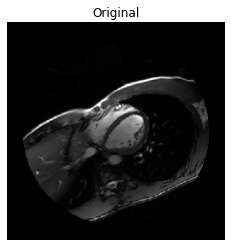

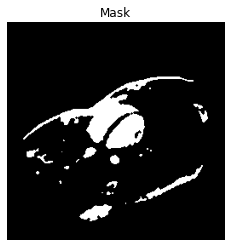

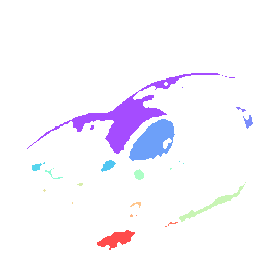

In [ ]:

import imageio
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt

dir = '/content/gdrive/My Drive/Video_Image_processing/'
im = imageio.imread(dir + 'SCD2001_MR_117.dcm')

# Smooth intensity values
im_filt = ndi.median_filter(im, size= 3)

# Select high-intensity pixels
mask_start = np.where(im_filt > 60, 1, 0)
mask = ndi.binary_closing(mask_start)

# Label the objects in "mask"
labels, nlabels = ndi.label(mask)
print('Num. Labels:', nlabels)

# Create a `labels` overlay
overlay = np.where(labels > 0, labels, np.nan)

# Use imshow to plot the overlay
show_image(im, 'Original')
show_image(mask, 'Mask')
plt.imshow(overlay, cmap='rainbow', alpha=0.7)
format_and_render_plot()

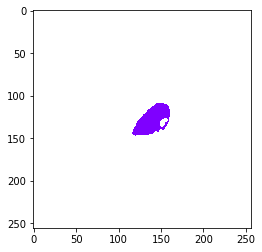

In [ ]:
# Label the image "mask"
labels, nlabels = ndi.label(mask)

# Select left ventricle pixels
lv_val = labels[128, 128]
lv_mask = np.where(labels== lv_val,1, np.nan)

# Overlay selected label
plt.imshow(lv_mask, cmap='rainbow')
plt.show()

Number of objects: 1
Indices for first box: (slice(107, 149, None), slice(116, 162, None))


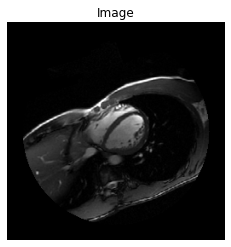

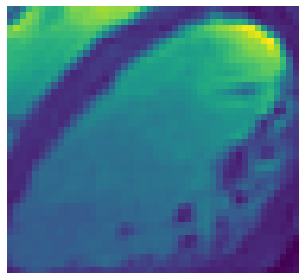

In [ ]:
# Create left ventricle mask
labels, nlabels = ndi.label(mask)
lv_val = labels[128, 128]
lv_mask = np.where(labels == lv_val, 1, 0)

# Find bounding box of left ventricle
bboxes = ndi.find_objects(lv_mask)
print('Number of objects:', len(bboxes))
print('Indices for first box:', bboxes[0])

# Crop to the left ventricle (index 0)
im_lv = im[slice(107, 149, None), slice(116, 162, None)]

# Plot the cropped image
show_image(im)
plt.imshow(im_lv)
plt.plot(107,149)
format_and_render_plot()

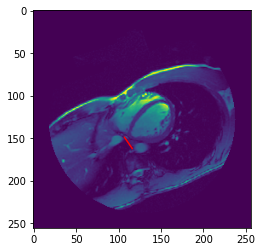

In [ ]:
plt.imshow(im)
plt.plot([107,116],[149, 162], color= 'red')

**Measure variance**

SciPy measurement functions allow you to tailor measurements to specific sets of pixels:

Specifying labels restricts the mask to non-zero pixels.
Specifying index value(s) returns a measure for each label value.
For this exercise, calculate the intensity variance of vol with respect to different pixel sets. 

We have provided the 3D segmented image as labels: label 1 is the left ventricle and label 2 is a circular sample of tissue.

In [ ]:


# Variance for all pixels
var_all = ndi.variance(vol)
print('All pixels:', var_all)

# Variance for labeled pixels
var_labels = ndi.variance(vol, labels)
print('Labeled pixels:', var_labels)

# Variance for each object
var_objects = ndi.variance(vol, labels, index=[1,2])
print('Left ventricle:', var_objects[0])
print('Other tissue:', var_objects[1])

In [ ]:
# Create histograms for selected pixels
hist1 = ndi.histogram(vol, min=0, max=255, bins=256)
hist2 = ndi.histogram(vol, 0, 255, 256, labels=labels)
hist3 = ndi.histogram(vol, 0, 255, 256, labels=labels, index=1)

# Plot the histogram density
plt.plot(hist1 / hist1.sum(), label='All pixels')
plt.plot(hist2 /hist2.sum(), label='All labeled pixels')
plt.plot(hist3/hist3.sum(), label='Left ventricle')
format_and_render_plot()

Calculate distance

A distance transformation calculates the distance from each pixel to a given point, usually the nearest background pixel. 

This allows you to determine which points in the object are more interior and which are closer to edges.

In [ ]:
# Create a mask of left ventricle pixels (Value of 1 in labels).
# Calculate the distance to background for each pixel using ndi.distance_transform_edt(). Supply pixel dimensions to the sampling argument.
# Print out the maximum distance and its coordinates using ndi.maximum and ndi.maximum_position.
# Overlay a slice of the distance map on the original image. This has been done for you.

# Calculate left ventricle distances
lv = np.where(labels == 1, 1, 0)
dists = ndi.distance_transform_edt(lv, sampling = vol.meta['sampling'])

# Report on distances
print('Max distance (mm):', ndi.maximum(dists))
print('Max location:', ndi.maximum_position(dists))

# Plot overlay of distances
overlay = np.where(dists[5] > 0, dists[5], np.nan) 
plt.imshow(overlay, cmap='hot')
format_and_render_plot()

Pinpoint center of mass

The distance transformation reveals the most embedded portions of an object. On the other hand, ndi.center_of_mass() returns the coordinates for the center of an object.

The "mass" corresponds to intensity values, with higher values pulling the center closer to it.

In [ ]:
# Extract centers of mass for objects 1 and 2
coms = ndi.center_of_mass(vol, labels, index=[1,2])
print('Label 1 center:', coms[0])
print('Label 2 center:', coms[1])

# Add marks to plot
for c0, c1, c2 in coms:
    plt.scatter(c2, c1, s=100, marker='o')
plt.show()

**Summarize the time series**

The ejection fraction is the proportion of blood squeezed out of the left ventricle each heartbeat. 

To calculate it, radiologists have to identify the maximum volume (systolic volume) and the minimum volume (diastolic volume) of the ventricle.

In [ ]:
# For this exercise, create a time series of volume calculations. There are 20 time points in both vol_ts and labels. 
# The data is ordered by (time, plane, row, col).

# Initialize an empty array with 20 elements using np.zeros().
# Calculate the volume of each image voxel. (Consult the meta dictionary for sampling rates.)
# For each time point, count the pixels in labels, and update the time series array.
# Plot the time series using plt.plot().

# Create an empty time series
ts = np.zeros(20)

# Calculate volume at each voxel
d0, d1, d2, d3 = vol_ts.meta['sampling']
dvoxel = d1 * d2 * d3

# Loop over the labeled arrays
for t in range(20):
    nvoxels = ndi.sum(1, labels[t], index=1)
    ts[t] = nvoxels * dvoxel

# Plot the data
plt.plot(ts)
format_and_render_plot()